In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# constants
attention_span = 3.0
switch_time = 0.5
n_timesteps = 1000

In [20]:
def modulate_attention(onset=3.0, attention_span=3.0, switch_time=0.5, max_t=10, n_timesteps=1000, rng=None):

    if rng is None:
        rng = np.random.default_rng()

    t = np.linspace(0, max_t, n_timesteps+1)
    a = np.zeros((n_timesteps+1, ))
    dt = max_t / n_timesteps

    a = a + rng.uniform(0, 0.1, size=n_timesteps+1)

    # Compute individual timestamps
    delay = onset + switch_time
    fixation = delay + attention_span
    release = fixation + switch_time


    for i in range(n_timesteps):
        if t[i] >= onset and t[i] < delay:
            a[i] = a[i-1] + dt / switch_time
        elif t[i] >= delay and t[i] < fixation:
            a[i] = 1
        elif t[i] >= fixation and t[i] < release:
            a[i] = a[i-1] - dt / switch_time
        else:
            a[i] = 0
    a = a * 0.96 + 0.02 + rng.uniform(0.0, 0.02, size=n_timesteps+1)
    return a

In [21]:
self_attention = modulate_attention()
joint_attention = 1 - self_attention
data = [self_attention, joint_attention]

C:\Users\Gerald Wong\AppData\Local\Temp\ipykernel_43444\3996536407.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = t, y = data[0], palette = 'blue', label="individual")
C:\Users\Gerald Wong\AppData\Local\Temp\ipykernel_43444\3996536407.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = t, y = data[1], palette = 'orange', label="collective")


Text(0, 0.5, 'Attentional Weight')

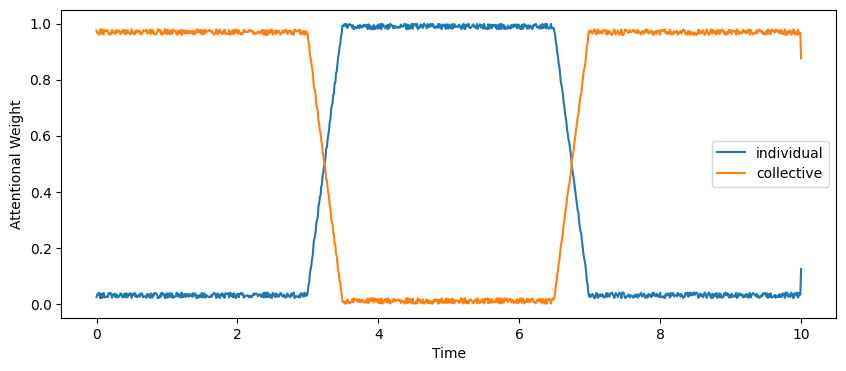

In [22]:
f, ax = plt.subplots(1, 1, figsize=(10, 4))
t = np.linspace(0, 10, 1001)
sns.lineplot(x = t, y = data[0], palette = 'blue', label="individual")
sns.lineplot(x = t, y = data[1], palette = 'orange', label="collective")
ax.set_xlabel("Time")
ax.set_ylabel("Attentional Weight")